In [12]:
import pickle
from sklearn.metrics import average_precision_score
import numpy as np

In [13]:
# Load the autoencoder scores
with open('autoencoder_score2.pkl', 'rb') as file:
    autoencoder_scores = pickle.load(file)

# Load the cross-entropy scores
with open('cross_entropy_score.pkl', 'rb') as file:
    cross_entropy_scores = pickle.load(file)

# Load the y_true values
with open('y_true.pkl', 'rb') as file:
    y_true = pickle.load(file)


In [14]:
mean_ae = np.mean(autoencoder_scores)
stddev_ae = np.std(autoencoder_scores)
normalized_autoencoder_scores = [(x - mean_ae) / stddev_ae for x in autoencoder_scores]

mean_ce = np.mean(cross_entropy_scores)
stddev_ce = np.std(cross_entropy_scores)

normalized_cross_entropy_scores = [(x - mean_ce) / stddev_ce for x in cross_entropy_scores]

In [15]:
weights_to_try = [i / 10 for i in range(11)]  # Weights from 0.0 to 1.0 in increments of 0.1

best_weight = None
best_average_precision = -1

for weight in weights_to_try:
    # Calculate the weighted sum of the scores
    score_sums = [(weight * ae_score) + ((1 - weight) * ce_score) for ae_score, ce_score in zip(normalized_autoencoder_scores, normalized_cross_entropy_scores)]

    # Calculate the average_precision_score for this combination of weights
    average_precision = average_precision_score(y_true, score_sums)

    # Print the current weight and average_precision_score
    print(f"CE Weight: {weight}, Average Precision Score: {average_precision}")

    # Check if this combination of weights gives a better result
    if average_precision > best_average_precision:
        best_average_precision = average_precision
        best_weight = weight

print(f"Best Weight: {best_weight}")
print(f"Best Average Precision Score: {best_average_precision}")

CE Weight: 0.0, Average Precision Score: 0.9184282248570583
CE Weight: 0.1, Average Precision Score: 0.9180279289700032
CE Weight: 0.2, Average Precision Score: 0.917071171595835
CE Weight: 0.3, Average Precision Score: 0.9156830278952687
CE Weight: 0.4, Average Precision Score: 0.9140601862086608
CE Weight: 0.5, Average Precision Score: 0.9121091850245596
CE Weight: 0.6, Average Precision Score: 0.9097934161612432
CE Weight: 0.7, Average Precision Score: 0.9070256344607849
CE Weight: 0.8, Average Precision Score: 0.9040720757864983
CE Weight: 0.9, Average Precision Score: 0.9007202530635803
CE Weight: 1.0, Average Precision Score: 0.8969194534002735
Best Weight: 0.0
Best Average Precision Score: 0.9184282248570583


In [38]:
oos_test_scores = score_sums[len(y_true)-sum(y_true):]

In [39]:
test_scores = score_sums[:len(y_true)-sum(y_true)]

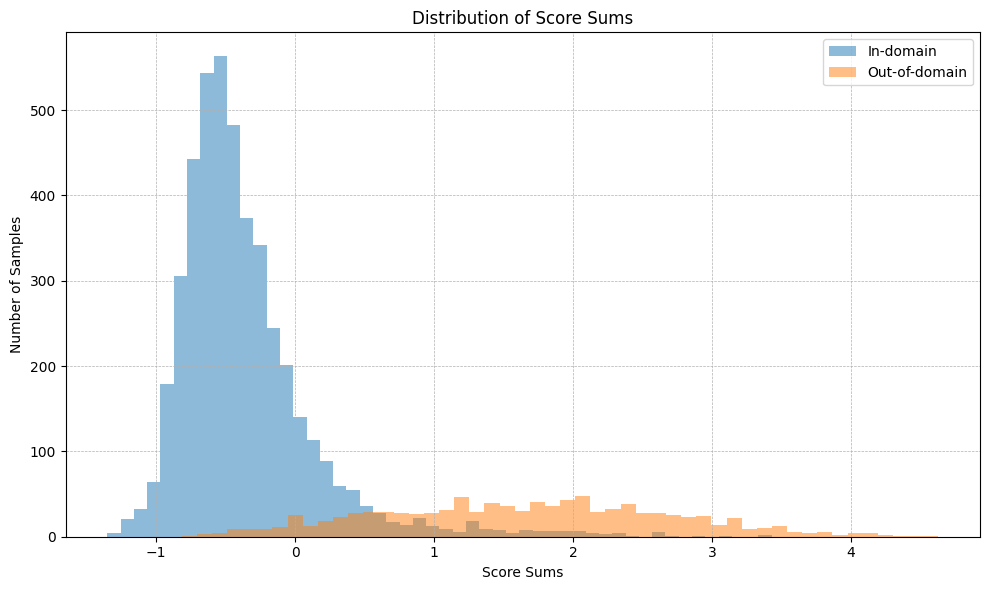

In [40]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(test_scores, bins=50, alpha=0.5, label='In-domain')
plt.hist(oos_test_scores, bins=50, alpha=0.5, label='Out-of-domain')

# Add legend, title, and labels
plt.legend(loc='upper right')
plt.title('Distribution of Score Sums')
plt.xlabel('Score Sums')
plt.ylabel('Number of Samples')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()
